In [1]:
#подключаем библиотеки
import numpy as np # большие многомерные массивы и матрицы, мат. функции для операций с этими данными
import matplotlib.pyplot as plt # визуализация данных 2D-графикой (3D тоже поддерживается)
import pandas as pd # анализ и обработка данных (таблицы DataFrame)
%matplotlib inline  
# для Notebook Jupyter. Вывод команд построения отображается в строке интерфейса непосредственно под кодом клетки.

In [2]:
data = pd.read_csv('winequality-white.csv', sep = ';', engine = 'python')

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


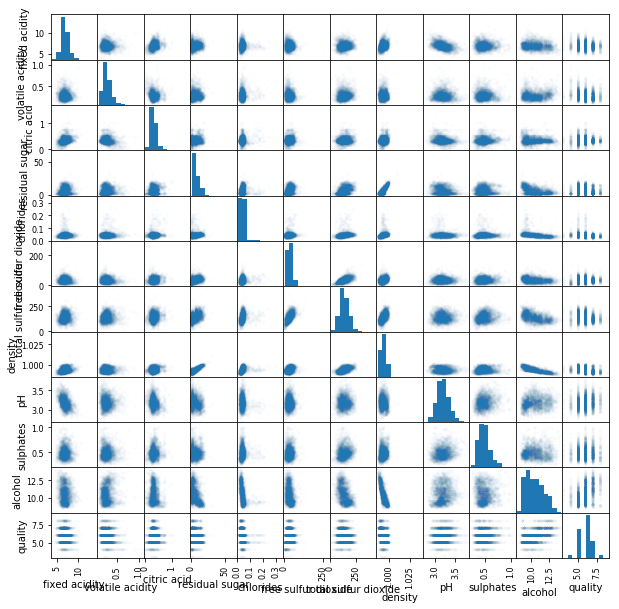

In [4]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

In [4]:
from sklearn.neural_network import MLPClassifier

In [5]:
X = data.drop(('quality'), axis = 1) 
Y_x = data['quality']
feature_names = X.columns

In [7]:
y=np.zeros(len(Y_x))

for i in range(len(y)-1):
    if Y_x[i] >=7:
        y[i]=1
    else:
        y[i]=0

        
print(X.shape)
print(y.shape)
N, d = X.shape

(4898, 11)
(4898,)


In [7]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y_x, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

3428 1470


In [8]:
# Обучение классификатора
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs',
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [9]:
# проверка качества классификатора
Y_train_pred = mlp_model.predict(X_train)
Y_test_pred = mlp_model.predict(X_test)

print(np.mean(y_train != Y_train_pred), np.mean(y_test != Y_test_pred))

0.5043757292882147 0.5102040816326531


In [10]:
err_test =  1 - mlp_model.score(X_test, y_test)
err_train =  1 - mlp_model.score(X_train, y_train)
print(err_train, err_test)

0.5043757292882147 0.5102040816326531


In [11]:
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

0.4956242707117853 0.4897959183673469


In [18]:
#  Подбор оптимального параметра регуляризации alpha
alpha_arr = np.logspace(-3, 2, 10)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,),
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    Y_train_pred = mlp_model.predict(X_train)
    Y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != Y_train_pred))
    test_err.append(np.mean(y_test != Y_test_pred))

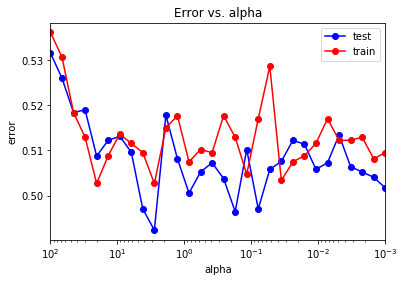

In [17]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass
plt.show()

из-за большой ошибки при работе с большим числом классов( в ходе регуляризации ошибка так и не опустилась существенно ниже 0.5, попробуем поработать с двумя классами, упросив задачу до определения хорошего и плохого вина. 

In [19]:
y=np.zeros(len(Y_x))

for i in range(len(y)-1):
    if Y_x[i] >=7:
        y[i]=1
    else:
        y[i]=0

        
print(X.shape)
print(y.shape)
N, d = X.shape

(4898, 11)
(4898,)


In [21]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

3918 980


In [22]:
# Обучение классификатора
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs',
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [25]:
err_test =  1 - mlp_model.score(X_test, y_test)
err_train =  1 - mlp_model.score(X_train, y_train)
print(err_train, err_test)

0.1955079122001021 0.21734693877551026


In [30]:
#  Подбор оптимального параметра регуляризации alpha
alpha_arr = np.logspace(-10, 10, 30)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,),
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    Y_train_pred = mlp_model.predict(X_train)
    Y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != Y_train_pred))
    test_err.append(np.mean(y_test != Y_test_pred))

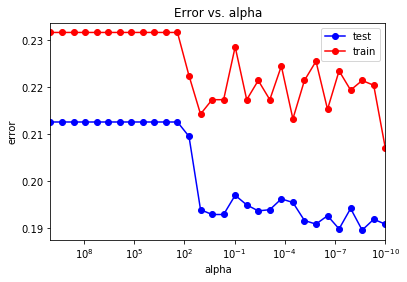

In [31]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass
plt.show()